In [270]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [271]:

file_path = '/home/ubuntu/Desktop/Coding/ML/Fuel_Consumption_2000-2022.csv'
data = pd.read_csv(file_path)

In [272]:
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION
0,2000,ACURA,1.6EL,COMPACT,1.6,4,X,9.2
1,2000,ACURA,1.6EL,COMPACT,1.6,4,X,8.5
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Z,12.2
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Z,13.4
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,X,10.0


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   FUEL              22556 non-null  object 
 7   FUEL CONSUMPTION  22556 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [274]:
data.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
FUEL                0
FUEL CONSUMPTION    0
dtype: int64

In [275]:
label_encoders = {}
categorical_columns = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'FUEL']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

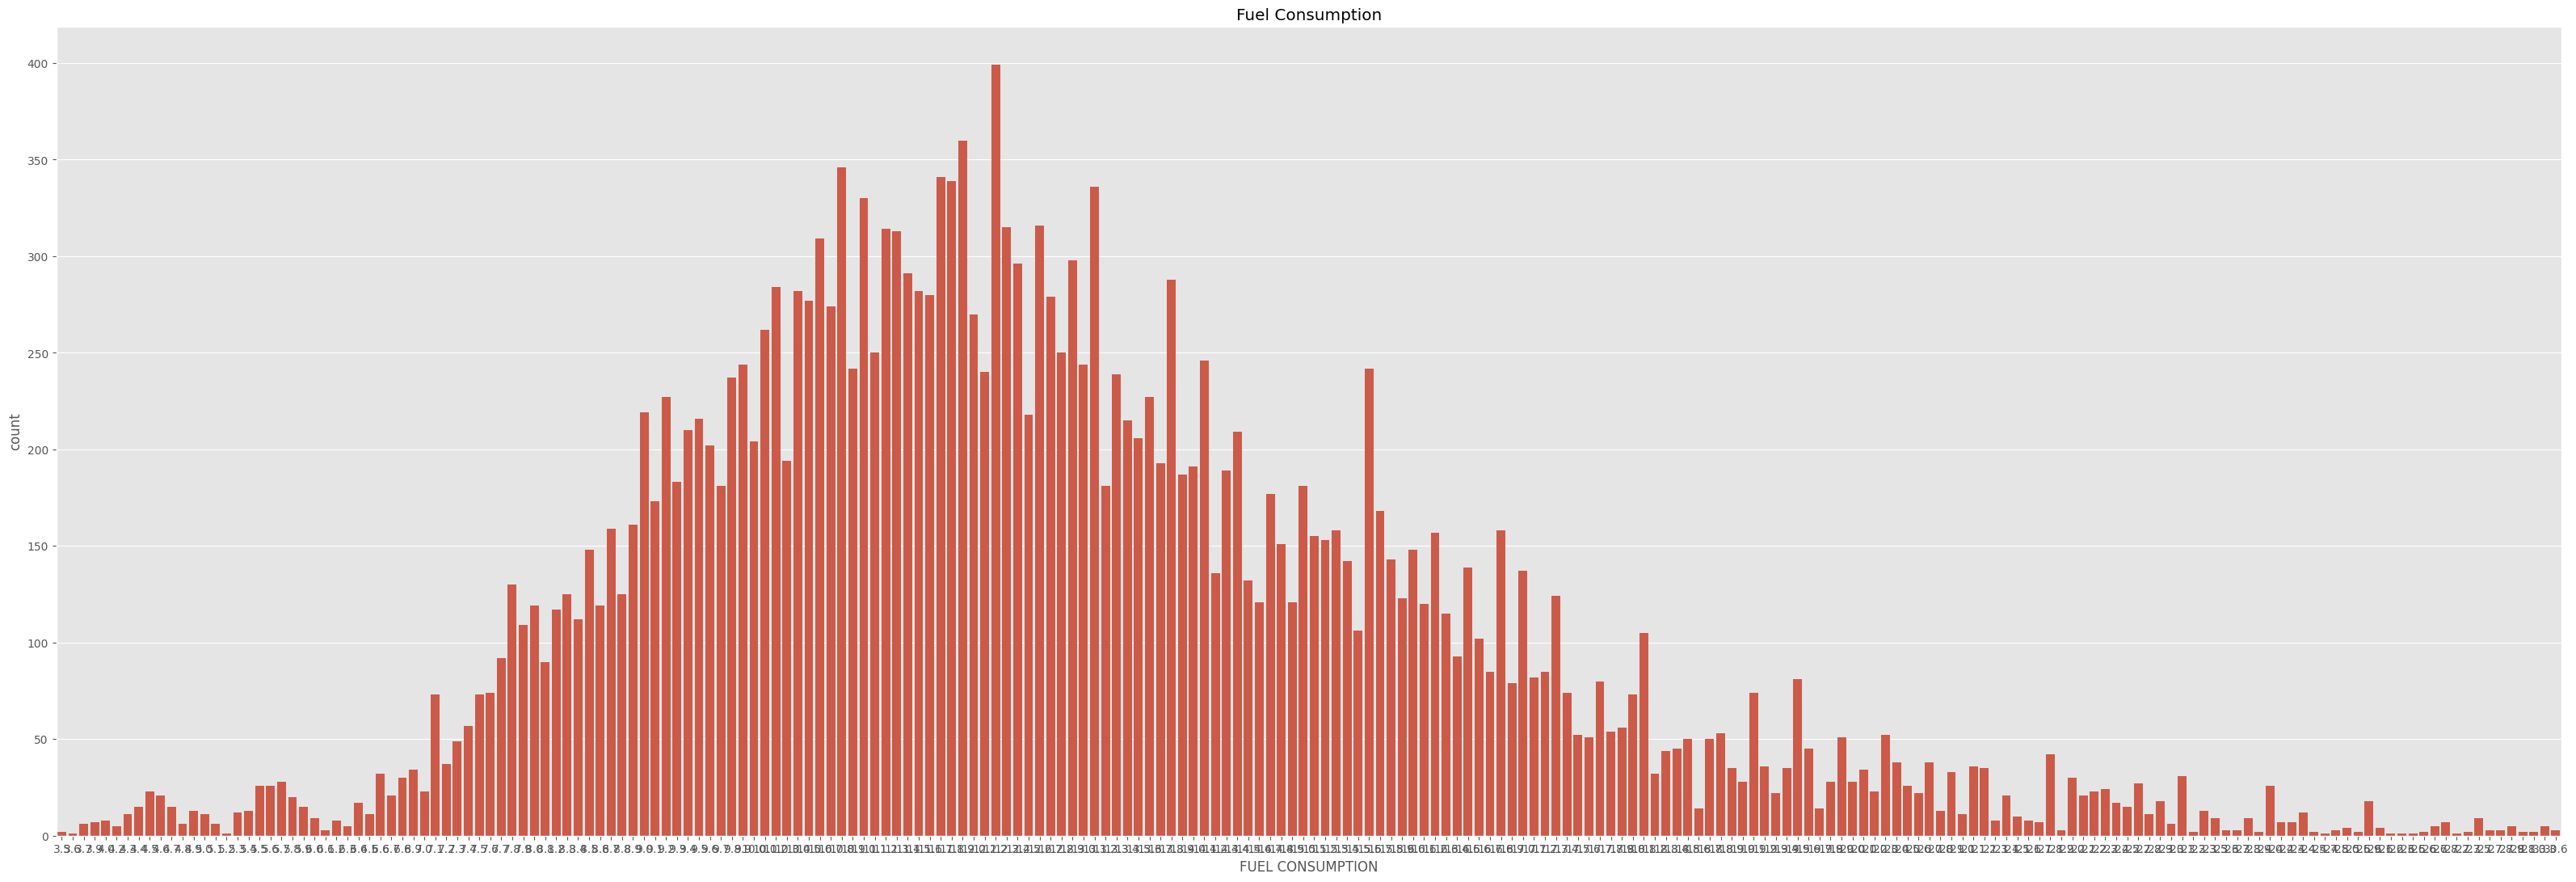

In [276]:
plt.figure(figsize=(40,13))
style.use('ggplot')
sns.countplot(x="FUEL CONSUMPTION",data=data)
plt.title("Fuel Consumption")
plt.show()

In [292]:
data['FUEL']=data['FUEL'].replace({'X':1,'Y':2,'Z':3})
data.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION
22551,2022,86,4061,21,2.0,4,4,10.7
22552,2022,86,4067,21,2.0,4,4,10.5
22553,2022,86,4068,21,2.0,4,4,11.0
22554,2022,86,4088,22,2.0,4,4,11.5
22555,2022,86,4089,22,2.0,4,4,12.4


In [278]:
x = data.drop(['FUEL CONSUMPTION'],axis=1)
y = data['FUEL CONSUMPTION']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [280]:
model = LinearRegression()

In [281]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 8.66756161, 16.85715994, 15.34444331, ..., 13.09838909,
        9.32942064, 12.53742092])

In [282]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  3.2800314024133495


In [283]:
r2 = r2_score(y_test, y_pred)
print("R2 score: ",r2) # Accuracy of prediction

R2 score:  0.7286767271735695


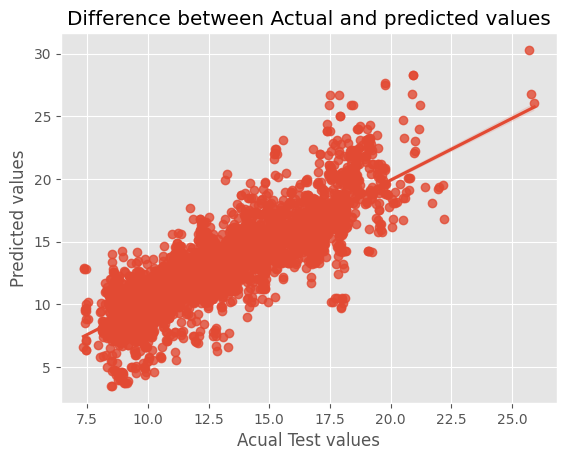

In [284]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Acual Test values')
plt.ylabel('Predicted values')
plt.title('Difference between Actual and predicted values')
plt.show()

In [297]:
dat={"YEAR":2022,"MAKE":0,"MODEL":1,"VEHICLE CLASS":3,"ENGINE SIZE":2.5,"CYLINDERS":4,"FUEL":3}
dat
index =[0]
custom=pd.DataFrame(dat,index)
custom

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL
0,2022,0,1,3,2.5,4,3


In [298]:
custpred=model.predict(custom)
print(custpred)

[10.07564134]
